# Superconductivity

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [2]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
# Usefull paths
data_dir = Path('Data')
figures_dir = Path('Figures')

In [5]:
# Load data
# imanes = pd.read_csv(data_dir / 'imanes.txt', sep=',', decimal='.')
# critical = pd.read_csv(data_dir / 'PuntoCritico1.txt', sep='\t', decimal=',')
imanes = pd.read_csv(data_dir / 'imanes.csv')
critical = pd.read_csv(data_dir / 'critical.csv')

In [8]:
# imanes.columns = imanes.columns.str.strip()
# imanes.to_csv(data_dir / 'imanes.csv', index=False)
imanes

,Bi,Y
0,5.326,5.885
1,5.176,5.738
2,5.196,5.933
3,5.095,NaN


In [9]:
time, volt, temp = critical.columns
critical.head()
# critical.to_csv(data_dir / 'critical.csv', index=False)

,t / s,U_B1 / V,Temp / K
0,0.0,0.829,282.3
1,0.5,0.828,282.2
2,1.0,0.827,281.9
3,1.5,0.827,281.6
4,2.0,0.826,281.3


## Plot

In [8]:
volt_threshold = 0.005
critical_times = critical[critical[volt]<=volt_threshold].iloc[[0, -1]][time].values
critical_temps = critical[critical[volt]<=volt_threshold].iloc[[0, -1]][temp].values

In [9]:
temp_critical, temp_critical_error = critical_temps.mean(), critical_temps.std()

print(f"Critical temperature: {temp_critical:.2f} ± {temp_critical_error:.2f} K")

Critical temperature: 108.95 ± 0.45 K


### Voltage and temperature over time

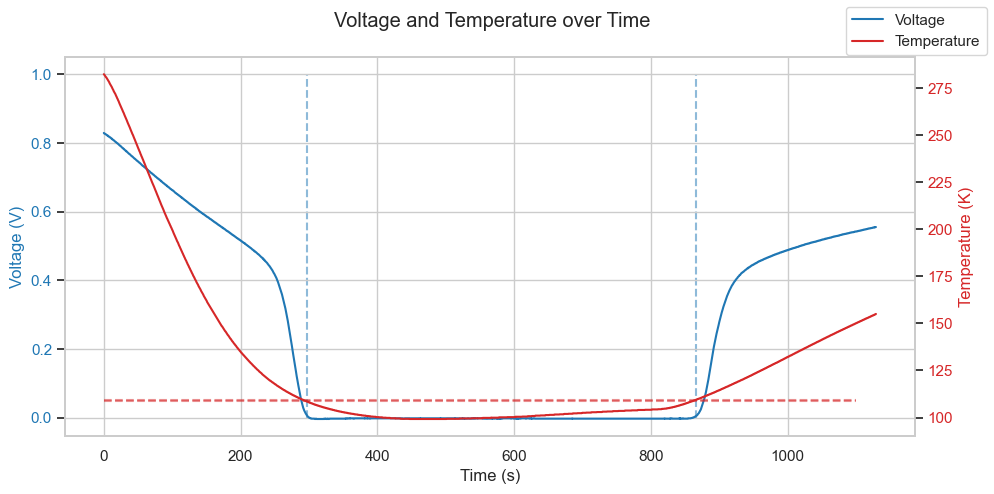

In [10]:
sns.set_theme(style='whitegrid')

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color=color)
ax1.plot(critical[time], critical[volt], color=color, label='Voltage', zorder=1)
# ax1.errorbar(critical[time], critical[volt], yerr=0.002, fmt='.', color=color, alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)

ax1.vlines(x=critical_times, ymin=0, ymax=1, color=color, linestyle='--', alpha=0.5, zorder=-1)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Temperature (K)', color=color)
ax2.plot(critical[time], critical[temp], color=color, label='Temperature', zorder=1)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)

ax2.hlines(y=critical_temps, xmin=0, xmax=1.1e3, color=color, linestyle='--', alpha=0.5, zorder=-1)

fig.suptitle('Voltage and Temperature over Time')
fig.legend(loc='upper right')
fig.tight_layout()

# plt.savefig(figures_dir / 'voltage_temperature_time.pdf')

### Voltage over temperature

In [11]:
temp_decreasing = critical[critical[temp].diff() < 0]
temp_increasing = critical[critical[temp].diff() > 0]

Text(0.5, 0.98, 'Voltage over Temperature')

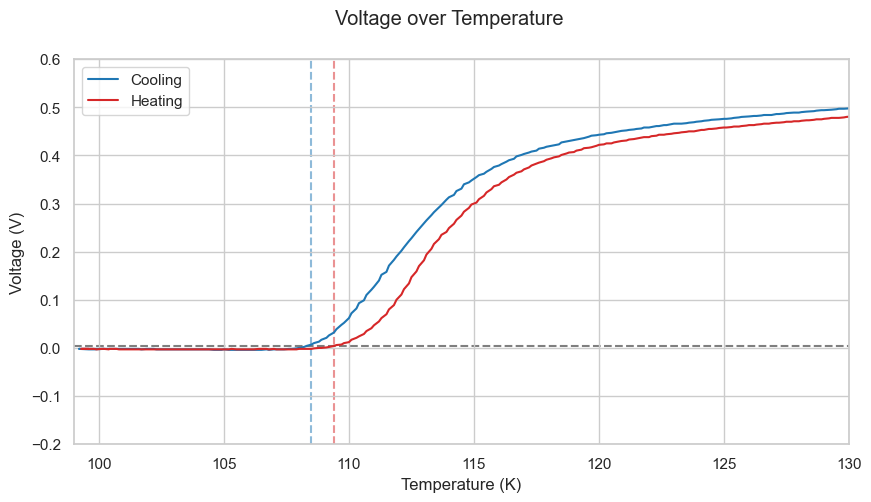

In [12]:
sns.set_theme(style='whitegrid')

fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Voltage (V)')

ax.plot(temp_decreasing[temp], temp_decreasing[volt], color='tab:blue', zorder=1, label='Cooling')
ax.plot(temp_increasing[temp], temp_increasing[volt], color='tab:red', zorder=1, label='Heating')

ax.vlines(x=critical_temps, ymin=-0.2, ymax=0.6, color=['tab:blue', 'tab:red'] , linestyle='--', alpha=0.5, zorder=-1)
ax.hlines(y=volt_threshold, xmin=99, xmax=130, color='black', linestyle='--', alpha=0.5, zorder=-1)

ax.set_xlim(99, 130)
ax.set_ylim(-0.2, 0.6)
ax.legend()

fig.suptitle('Voltage over Temperature')

# plt.savefig(figures_dir / 'voltage_temperature.pdf')

## Meissner effect

In [13]:
imanes

,Bi,Y
0,5.326,5.885
1,5.176,5.738
2,5.196,5.933
3,5.095,NaN


In [14]:
v_Bi = imanes['Bi'].mean()
v_Y = imanes['Y'].mean()

print(f"Voltage for Bismuth: {v_Bi:.3f} V")
print(f"Voltage for Yttrium: {v_Y:.3f} V")

Voltage for Bismuth: 5.198 V
Voltage for Yttrium: 5.852 V


In [15]:
f = 298.73
f_err = 0.18

g = -45.18
g_err = 0.25

h = 2.28
h_err = 0.09

p = -0.05
p_err = 0.009

coeffs = np.array([f, g, h, p])
errors = np.array([f_err, g_err, h_err, p_err])

In [16]:
def crit_temp(V, coeffs, errors):
	f, g, h, p = coeffs + errors

	return f + g * V + h * V**2 + p * V**3

In [17]:
T_bi_min = crit_temp(v_Bi, coeffs, -errors)
T_bi_max = crit_temp(v_Bi, coeffs, errors)

T_bi = (T_bi_min + T_bi_max) / 2
T_bi_error = (T_bi_max - T_bi_min) / 2

T_Y_min = crit_temp(v_Y, coeffs, -errors)
T_Y_max = crit_temp(v_Y, coeffs, errors)

T_Y = (T_Y_min + T_Y_max) / 2
T_Y_error = (T_Y_max - T_Y_min) / 2


print(f"Critical temperature for Bi: {T_bi:.1f} +- {T_bi_error:.1f} K")
print(f"Critical temperature for Y: {T_Y:.1f} +- {T_Y_error:.1f} K")

Critical temperature for Bi: 118.5 +- 5.2 K
Critical temperature for Y: 102.4 +- 6.5 K
